In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
rd=0.0174533
pov=100
ppx=13 #player position in x 
ppy=2 #player position in y
pva=0 #player view angle

miniMapResolution=[480,854]
MapSize=[16,16]

# Import and initialize the pygame library
import pygame
pygame.init()
#Import pygame.locals for easier access to key coordinates
#Updated to conform to flake8 and black standards
from pygame.locals import (
    K_UP,
    K_DOWN,
    K_LEFT,
    K_RIGHT,
    K_ESCAPE,
    KEYDOWN,
    QUIT,
)
GameResolution=[1280, 720]
x,y=250, 250
# Set up the drawing window



pygame 2.1.0 (SDL 2.0.16, Python 3.9.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


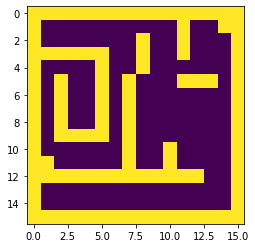

In [2]:
mp=[[1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 1, 1.,1],
    [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,1],
    [1,0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,1],
    [1,1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,1],
    [1,0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0, 1],
    [1,0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,1],
    [1,1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,1],
    [1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 0, 0.  ,1  ],
    [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 1, 1.,1]]
plt.imshow(mp)

In [3]:
plx=2
ply=2
pla=0


In [14]:
def checkY(x,y,Levelmap):
    x,y=CorToMat(x,y,len(Levelmap))
    try:
        if(Levelmap[x][y]==1):
            return True
        else:
            return False
    except:
        return True
    

    

def lineTracer(x,y,lineAngle,Levelmap):##4.0
    ym=1
    xm=1
    if(lineAngle>=0 and lineAngle<90):
        ym=1
        xm=1
    elif(lineAngle>=90 and lineAngle<180):
        ym=1
        xm=-1
    elif(lineAngle>=180 and lineAngle<270):
        ym=-1
        xm=-1
    elif(lineAngle>=180 and lineAngle<270):
        ym=-1
        xm=1
    
    
    dely=math.tan(lineAngle*rd)
    delx=1/dely
    
    llpy=math.sin(lineAngle*rd)
    llpx=math.cos(lineAngle*rd)
    tllpy=llpy
    tllpx=llpx
    lineLen=0
    while True:
        
        if(tllpy<tllpx):
            lineLen+=tllpy
            tllpx-=tllpy
            tllpy=llpy
            y+=1*ym
            x+=delx*xm
            
        else:
            lineLen+=tllpx
            tllpy-=tllpx
            tllpx=llpx
            x+=1*xm
            y+=dely*ym
        if checkY(x,y,Levelmap):
            break
    
        
    
    return lineLen
    

  
   
    
 


In [5]:
def giveAbsAngle(angle):
    if(angle>=0 and angle<360):
        return angle
    if(angle<0):
        return 360-angle
    elif(angle>359):
        return angle-360
        
    

In [6]:
#testing absolute angle method




In [16]:
def threDRenderer(x,y,a,surface,mp):
    #### Define Variable :-
    gh=480
    gw=480
    FOV=50
    StartAngle=a-FOV;
    EndAngle=a+FOV;
    AngularStep=(FOV*2)/gh
    PlayerHeight=0
    center=(gh/2)-1
    
    ############################################    
    #             FRAME DRAWING 
    ###########################################    
    
    lac=StartAngle
    for i in range(480,480*2):
      
      ########################################### 
      #.    Get line length
      ########################################### 
      la=StartAngle
      la=giveAbsAngle(la)
      ln=lineTracer(x,y,la,mp)
    
      ########################################### 
      #.    Get perpendicular length
      ###########################################
      angleBeetweenLines=abs(a-la)
      ln=ln*math.cos(angleBeetweenLines*rd)
      ln*=2

      ########################################### 
      ##        height calculation
      ########################################### 
      height=gh/(ln)
      #print(height)
      
      ########################################### 
      ##        Draw Column
      ########################################### 
      sy=0
      ey=0
      if(height>=gh):
            sy=0
            ey=gh-1

      else:
          sy=center-(height/2)
          ey=center+(height/2)
      
      pygame.draw.line(surface, (0,0,255), (i,sy), (i,ey))
      StartAngle+=AngularStep
      
    

In [8]:
############################################################################

#         ##MATRIX TO ABSOLUTE CORDINATE CONVERSTION
    
############################################################################
def MatToCor(i,j,ylen):
    
    x=j
    y=ylen-1-i
    return (x,y)
    







In [9]:
############################################################################

#         ##MATRIX TO ABSOLUTE CORDINATE CONVERSTION
    
############################################################################
def CorToMat(x,y,ylen):
    j=x
    i=ylen-1-y
    return(i,j)
    
    

In [10]:
############################################################################

#         ##ABSOLUTE CORDINATE to screed CONVERSTION
    
############################################################################
def CorToSrc(x,y,ylen):

    i=ylen-1-y
    return(x,i)
    

In [11]:
###2D Engine
def d2renderer(screen2d,x,y,playerAngle):
    
    ################################
    #       RENDER MAP
    ################################
    factor=480/16
    for i in range(len(mp)):
        for j in range(len(mp)):
            if(mp[i][j]==1):
                pygame.draw.rect(screen2d, (10,10,255), pygame.Rect(j*factor, i*factor, factor, factor))
    
    
    #####################################
    ###      Render player 
    #####################################       
    
    xi,yi=CorToSrc(x,y,16)
    pygame.draw.circle(screen2d, (225,0,0), (xi*factor,yi*factor),5)
    
    #####################################
    #         Render Line
    #####################################
    
    ###Calculate point of line 
    endx=x+1*math.cos(playerAngle*rd)
    endy=y+1*math.sin(playerAngle*rd)
    xi,yi=CorToSrc(x,y,16)
    endx,endy=CorToSrc(endx,endy,16)
    pygame.draw.line(screen2d,(255,255,0),(xi*factor,yi*factor),(endx*factor,endy*factor))
    
    
    
    

In [20]:
def update(pressed_keys,x,y,a):
    
    
    if pressed_keys[K_UP]:

        x+=0.06*math.cos(a*rd)
        y+=0.06*math.sin(a*rd)
    if pressed_keys[K_DOWN]:
        x-=0.06*math.cos(a*rd)
        y-=0.06*math.sin(a*rd)
    if pressed_keys[K_LEFT]:
        a+=3
    if pressed_keys[K_RIGHT]:
        a-=3
    a=giveAbsAngle(a)
    return(x,y,a)

In [21]:
# Simple pygame program


screen = pygame.display.set_mode(GameResolution)
screen = pygame.display.set_mode([480*2,480])

# Run until the user asks to quit
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
    
    
    
    ########################################
    #.          CLICK EVENT HANDLER
    #########################################
    pressed_keys = pygame.key.get_pressed()
    #print(pressed_keys)
    plx,ply,pla=update(pressed_keys,plx,ply,pla)
    
    
    
    
    ########################################
    #.          DRAW ON SCREEN
    #########################################    
    
    #Fill the background with white
    screen.fill((255, 255, 255))
    d2renderer(screen,plx,ply,pla)
    threDRenderer(plx,ply,pla,screen,mp)
    
    #Flip the display
    pygame.display.flip()

# Done! Time to quit.
pygame.quit()